In [1]:
#%matplotlib inline #put plots here not is separate window

import pandas as pd # to handle data as dataframes
import scipy as sp #import statistics methods and scientific computing
import numpy as np #import numerical computing
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt #sets up plotting under plt
import seaborn as sns #sets up styles and gives us more plotting options

%matplotlib inline

pd.set_option('display.width',500)
pd.set_option('display.max_columns',100)



In [2]:
df = pd.read_csv("/Users/pratpuri/Desktop/books.csv")
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653.0,4942365.0,155254.0,66715.0,127936.0,560092.0,1481305.0,2706317.0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPr�",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479.0,4800065.0,75867.0,75504.0,101676.0,455024.0,1156318.0,3011543.0,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839.0,3916824.0,95009.0,456191.0,436802.0,793319.0,875073.0,1355439.0,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671.0,3340896.0,72586.0,60427.0,117415.0,446835.0,1001952.0,1714267.0,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664.0,2773745.0,51992.0,86236.0,197621.0,606158.0,936012.0,947718.0,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
df.dtypes



book_id                        int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                float64
work_ratings_count           float64
work_text_reviews_count      float64
ratings_1                    float64
ratings_2                    float64
ratings_3                    float64
ratings_4                    float64
ratings_5                    float64
image_url                     object
small_image_url               object
dtype: object

In [4]:
df.shape

(99, 23)

In [5]:
df.shape[0]

99

In [6]:
df.columns

Index([u'book_id', u'goodreads_book_id', u'best_book_id', u'work_id', u'books_count', u'isbn', u'isbn13', u'authors', u'original_publication_year', u'original_title', u'title', u'language_code', u'average_rating', u'ratings_count', u'work_ratings_count', u'work_text_reviews_count', u'ratings_1', u'ratings_2', u'ratings_3', u'ratings_4', u'ratings_5', u'image_url', u'small_image_url'], dtype='object')

In [7]:
type(df.columns[0])

str

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
#percentage of ratings less than 4
np.sum(df.average_rating < 5)/float(df.shape[0])

0.98989898989898994

In [10]:
(df.average_rating<5).mean() #since df.average_rating is panda series (type) you can apply mean directly

0.98989898989898994

In [11]:
#query
df.query("average_rating < 4 & best_book_id==41865")
df[(df.average_rating < 4) & (df.best_book_id==41865)] #you can make bigger queries using boolean & and | operations; use brackets to separate

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839.0,3916824.0,95009.0,456191.0,436802.0,793319.0,875073.0,1355439.0,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [12]:
#cleaning
##step1: finding what kind of dtypes
df.dtypes #here original publication year is float, it should be int
##lets fix this
df['original_publication_year'] = df.original_publication_year.astype(int) 
#it will not work this this has either inf or NA


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
##now check if this has NULL
df[df.original_publication_year.isnull()]

In [ ]:
#fixing the NaN thing; if you have large dataset then you can remove NaN rows else replace them with 0 or some other value
df.head()
df = df[df.original_publication_year.notnull()] #removes rows in which pub_year is NaN
df.head()
#you can retry conversion to int after removing NaN

4.05693877551 4.05693877551 4.06


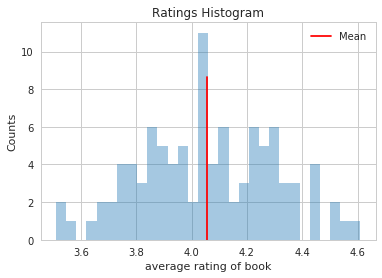

In [13]:
sns.set_context("notebook")
meanrat=df.average_rating.mean()
#you can get means and medians in different ways
print meanrat, np.mean(df.average_rating), df.average_rating.median()
with sns.axes_style("whitegrid"):
    df.average_rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("average rating of book")
    plt.ylabel("Counts")
    plt.title("Ratings Histogram")
    plt.legend()
    #sns.despine()
    #if you want to plot on log scale then use
    #plt.xscale("log")
    #plt.xlim(10,50) #plots xaxis between 10-50
    #scatterplot: plt.scatter(alist1, alist2,lw=0, alpha=.08);

In [18]:
#vectorization
#in normal python aray or list if you do arr1+arr2 it will append arr2 to arr1 
#but in numpy array it will perform elementwise addition

arr1 = np.array([1,2,3,4])
arr2 = np.array([7,8,9,5])
#they have to be same length/shape
print arr1+arr2

[ 8 10 12  9]


In [20]:
#you can calculate mean median mode for a list/np_array
np.mean(arr1), np.median(arr1), np.std(arr1)

(2.5, 2.5, 1.1180339887498949)